
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


In [42]:
import pandas as pd
import numpy as np
# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest # para hacer el ztest

import sys
sys.path.append("../")
from src.soporte_abtesting import(
    exploracion_dataframe,
    Asunciones,
    Pruebas_parametricas
)
import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 
import matplotlib.pyplot as plt
import seaborn as sns

#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes. Cada uno de los metodos se realizan en maquinas distintas. Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación.  Si los tiempos de fabricacion son negativos significara que las maquinas estuvieron paradas esos minutos. 




In [8]:
df_montaje = pd.read_csv("datos/linea_montaje.csv")
df_montaje.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


La tabla parece contener que método se ha usado y cuanto tiempo se ha tardado en realizar el mismo

In [9]:
exploracion_dataframe(df_montaje,"metodo")

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491



1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

Aquí debo verificar:
- Normalidad (usar, Shapiro o Kolmogorov)
    - Shapiro <= 30
    - Ruso > 30
- Homogeneidad de Varianzas (usar Levene o Barlett)
    - Levene: Cuando hay colitas pero tiene normalidad
    - Barlett: Cuando es normal 100%
- Independencia de Observaciones: Es independiente


In [76]:
df_montaje[df_montaje["minutos"] < 0]

,minutos,metodo
76,-0.818899,B
99,-0.187206,B


### Normalidad

<Axes: xlabel='metodo', ylabel='count'>

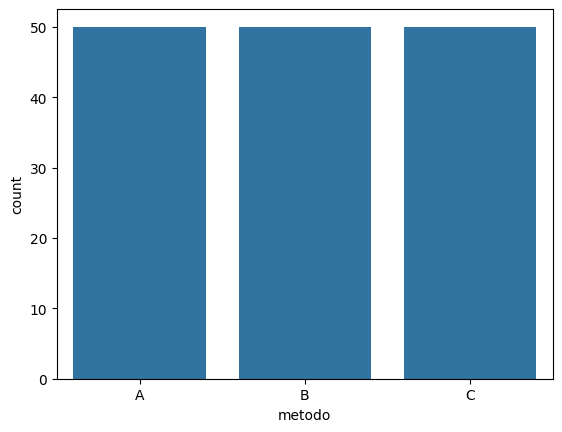

In [20]:
sns.countplot(x= "metodo",data=df_montaje)

Misma cantidad de Muestras

In [51]:
dfA = df_montaje[df_montaje["metodo"] == "A" ]
dfB = df_montaje[df_montaje["metodo"] == "B" ]
dfC = df_montaje[df_montaje["metodo"] == "C" ]
print("Asimetría método A: ",dfA["minutos"].skew())
print("Asimetría método B: ",dfB["minutos"].skew())
print("Asimetría método C: ",dfC["minutos"].skew())

Asimetría método A:  0.24858239279024988
Asimetría método B:  -0.6771950324809352
Asimetría método C:  0.6102537075710666


Asimetría método A ligeramente a la derecha (hay más valores que van hacia 0 que hacia arriba), casi simétrica

Asimetría método B sesgo a la izquierda (valores hacia arriba)

Asimetría método C sesgo a la derechas (hacia 0)


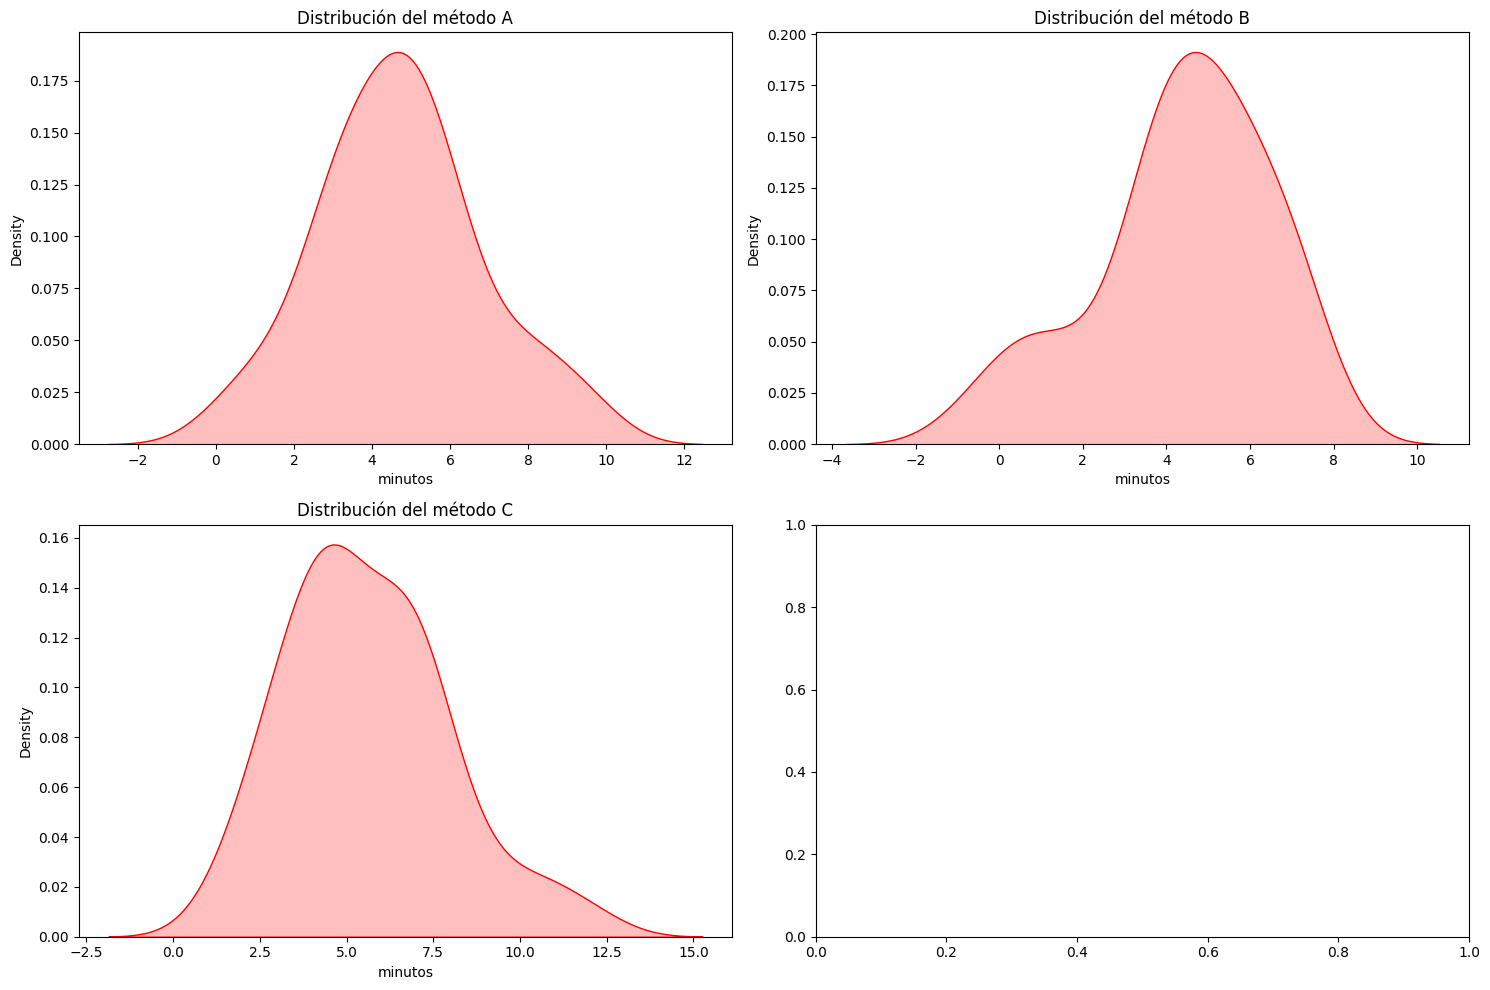

In [40]:
lista_metodos = df_montaje["metodo"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, metodo in enumerate(lista_metodos):
    sns.kdeplot(x="minutos", data=df_montaje[df_montaje["metodo"] == metodo], ax=axes[indice], fill=True, color="red")
    axes[indice].set_title(f"Distribución del método {metodo}")

plt.tight_layout()
plt.show()


In [68]:
dfA = df_montaje[df_montaje["metodo"] == "A" ]
montaje = Asunciones(dfA,"minutos")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")


Para la columna minutos, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [69]:
dfB = df_montaje[df_montaje["metodo"] == "B" ]
montaje = Asunciones(dfB,"minutos")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")

Para la columna minutos, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [70]:
dfC = df_montaje[df_montaje["metodo"] == "C" ]
montaje = Asunciones(dfC,"minutos")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")

Para la columna minutos, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


### Homogeneidad de Varianzas (usar Levene)
Al no ser normalizada del todo, uso levene

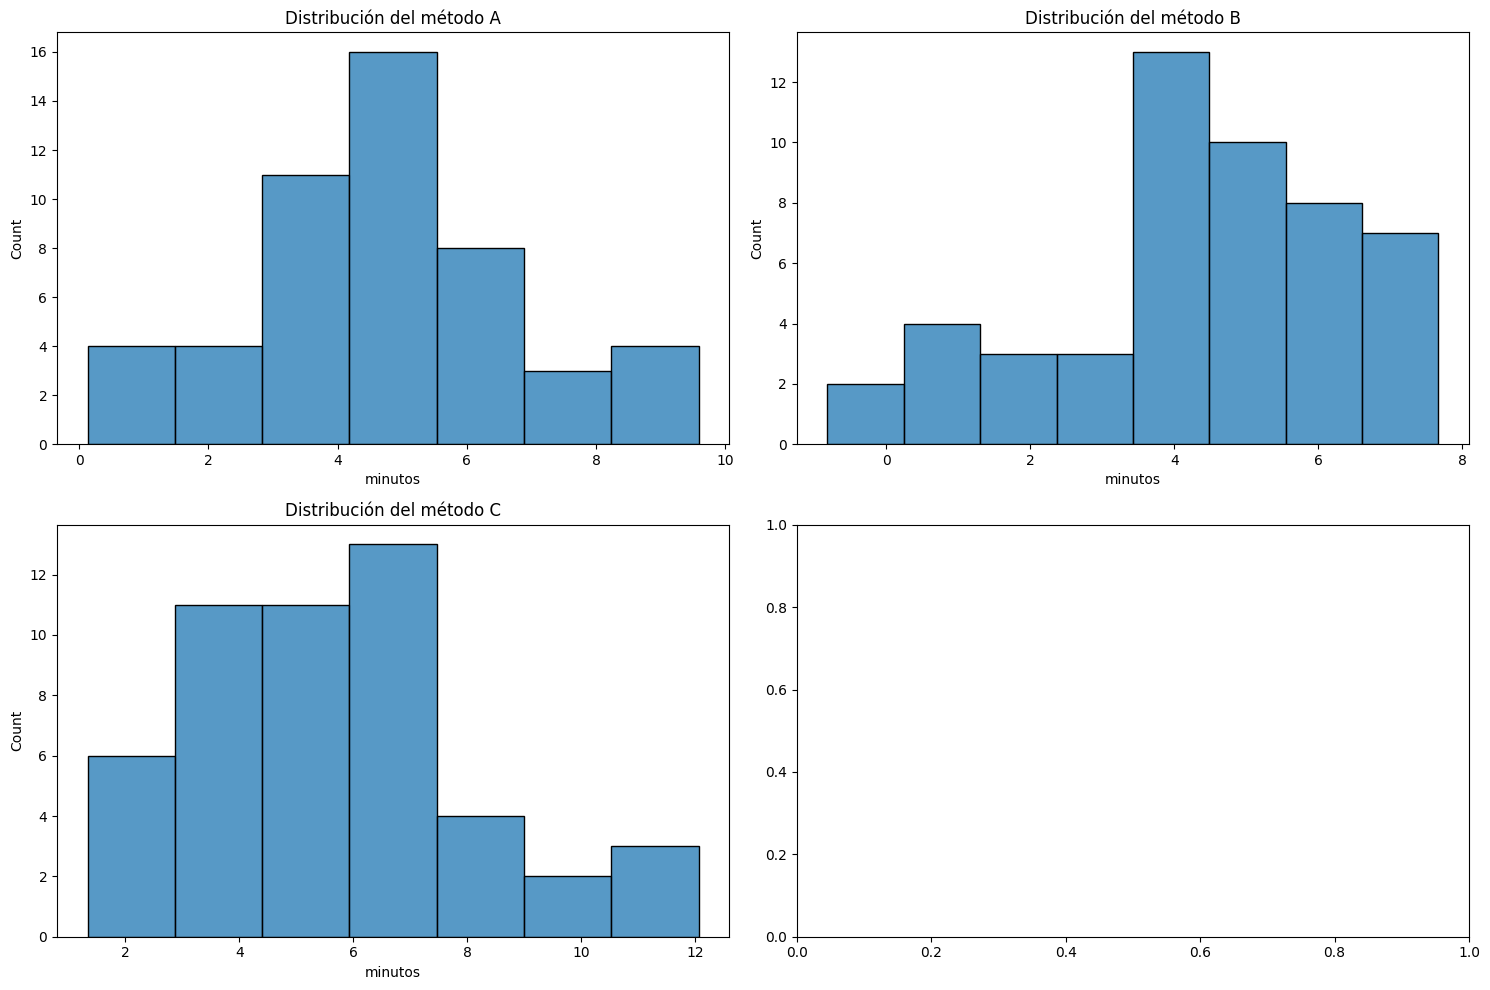

In [52]:
lista_metodos = df_montaje["metodo"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, metodo in enumerate(lista_metodos):
    sns.histplot(x="minutos", data=df_montaje[df_montaje["metodo"] == metodo], ax=axes[indice])
    axes[indice].set_title(f"Distribución del método {metodo}")

plt.tight_layout()
plt.show()


In [73]:
montaje = Asunciones(df_montaje,"minutos")
montaje.identificar_homogeneidad("metodo")


En la variable metodo las varianzas son homogéneas entre grupos.



2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?



Text(0.5, 1.0, 'Media de Minutos por método')

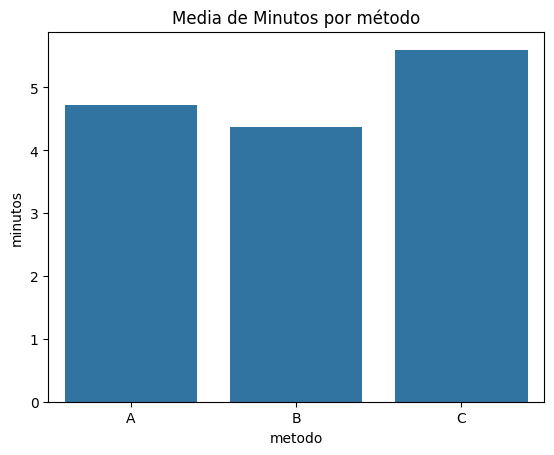

In [ ]:
df_tasa = df_montaje.groupby("metodo")["minutos"].mean()
df_tasa
sns.barplot(df_tasa)
plt.title("Media de Minutos por método")

Parece que si afecta no? pero ahora falta hacer el Anova para ver si realmente es así

In [75]:
parametricas = Pruebas_parametricas("metodo","minutos",df_montaje)
parametricas.test_anova()

Estadístico F: 4.275128289148849
Valor p: 0.015679251126397998
El p-valor de la prueba es 0.02, por lo tanto, hay diferencias significativas entre los grupos.


3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

- Teniendo en cuenta los resultados, y que B tiene valores negativos (lo que significa parada de producción donde no se ha trabajado) indicaría que el método de trabajo **A es el más eficiente**


#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.




1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?


In [80]:
df_fluido = pd.read_csv("datos/densidad_fluidos.csv")
df_fluido.sample()

,temperatura,densidad
153,125,21.555014


La temperatura es nuestro método

In [85]:
df_fluido["temperatura"]=df_fluido["temperatura"].astype("O")

Aquí debo verificar:
- Normalidad (usar, Shapiro o Kolmogorov)
    - Shapiro <= 30
    - Ruso > 30
- Homogeneidad de Varianzas (usar Levene o Barlett)
    - Levene: Cuando hay colitas pero tiene normalidad
    - Barlett: Cuando es normal 100%
- Independencia de Observaciones: Es independiente

<Axes: xlabel='temperatura', ylabel='count'>

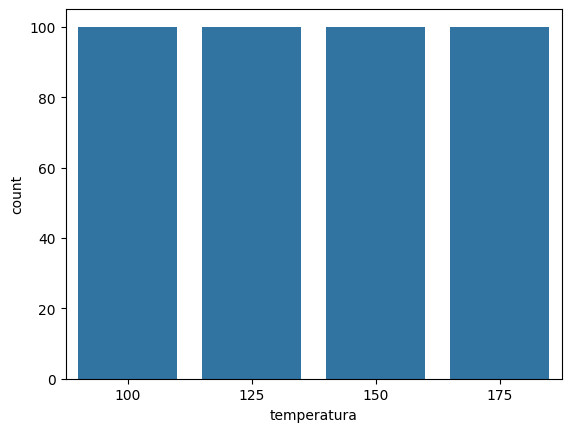

In [88]:
sns.countplot(x= "temperatura",data=df_fluido)

Misma cantidad de muestras

In [90]:
dfA = df_fluido[df_fluido["temperatura"] == 100 ]
dfB = df_fluido[df_fluido["temperatura"] == 125 ]
dfC = df_fluido[df_fluido["temperatura"] == 150 ]
dfD = df_fluido[df_fluido["temperatura"] == 175 ]
print("Asimetría 100ºC: ",dfA["densidad"].skew())
print("Asimetría 125ºC: ",dfB["densidad"].skew())
print("Asimetría 150ºC: ",dfC["densidad"].skew())
print("Asimetría 175ºC: ",dfD["densidad"].skew())

Asimetría 100ºC:  -0.1779481426259408
Asimetría 125ºC:  0.38698376473655466
Asimetría 150ºC:  0.17776158930861544
Asimetría 175ºC:  0.1996406173534096


- Asimetria 100: Asimetría ligera a la izquierda
- Asimetría 125: Asimetría con sesgo a la derecha
- Asimetría 150: Asimetria ligera, sesgo a la derecha
- Asimetría 175: Asimetría ligera, sesgo a la derecha

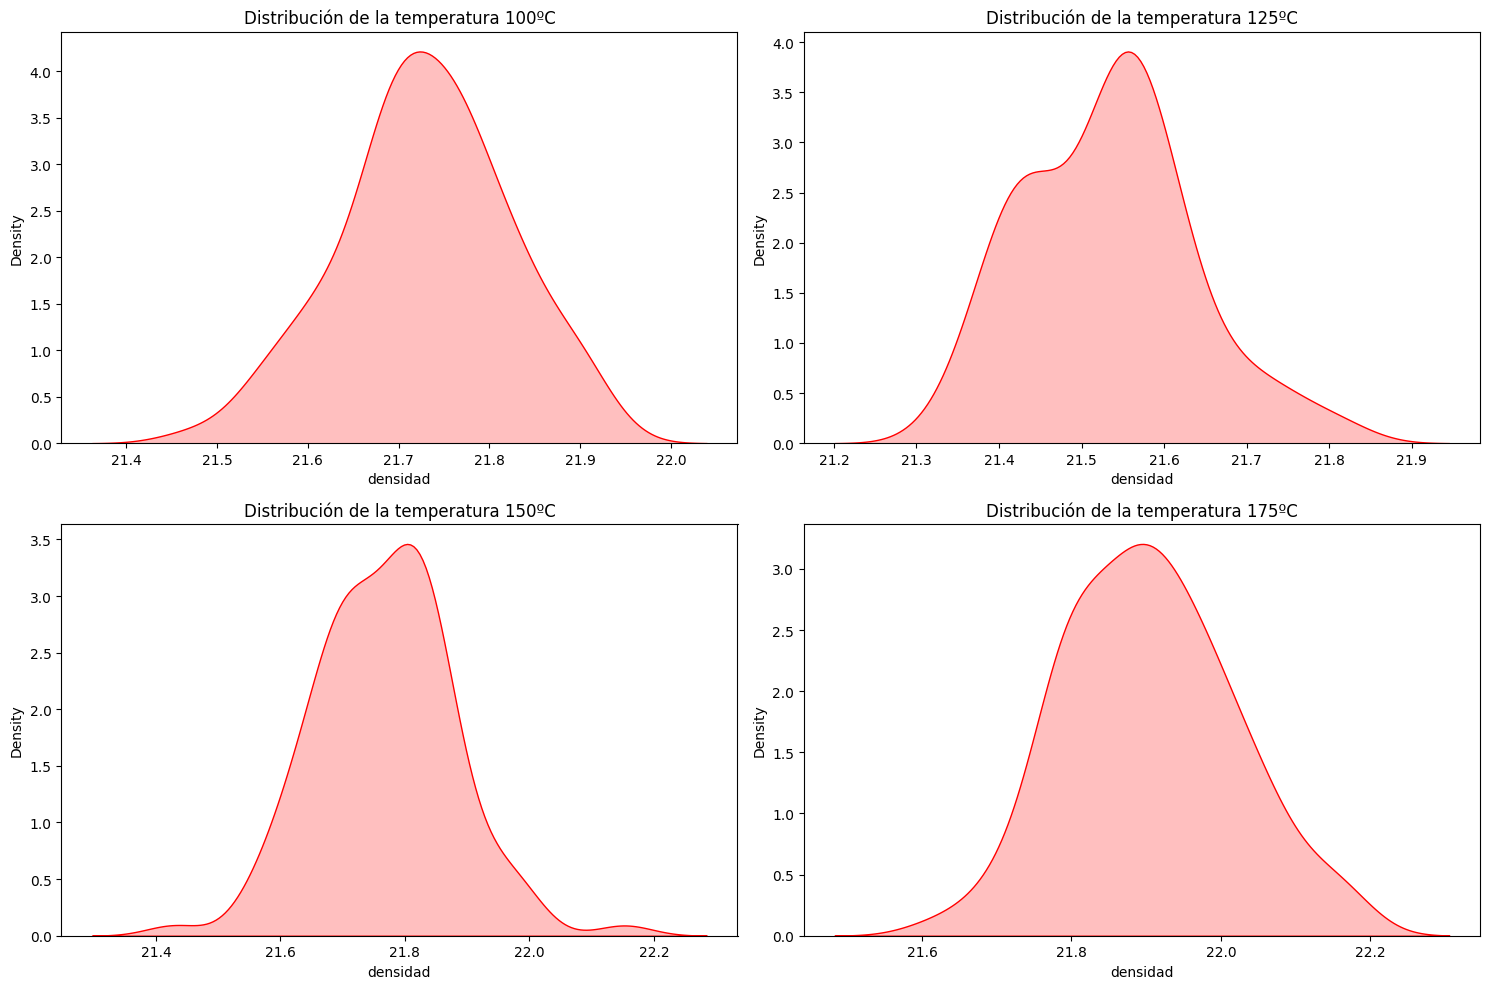

In [94]:
lista_temperaturas = df_fluido["temperatura"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice,temperatura in enumerate(lista_temperaturas):
    sns.kdeplot(x="densidad", data=df_fluido[df_fluido["temperatura"] == temperatura], ax=axes[indice], fill=True, color="red")
    axes[indice].set_title(f"Distribución de la temperatura {temperatura}ºC")

plt.tight_layout()
plt.show()

In [96]:
dfA = df_fluido[df_fluido["temperatura"] == 100 ]
montaje = Asunciones(dfA,"densidad")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")


Para la columna densidad, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [97]:
dfB = df_fluido[df_fluido["temperatura"] == 125 ]
montaje = Asunciones(dfB,"densidad")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")


Para la columna densidad, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [98]:
dfC = df_fluido[df_fluido["temperatura"] == 150 ]
montaje = Asunciones(dfC,"densidad")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")


Para la columna densidad, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [99]:
dfD = df_fluido[df_fluido["temperatura"] == 175 ]
montaje = Asunciones(dfD,"densidad")
montaje.identificar_normalidad_analitica(metodo="kolmogorov")


Para la columna densidad, los datos siguen una distribución normal según el test de Kolmogorov-Smirnov.


### Homogeneidad de Varianzas (usar Levene)
Al no ser normalizada del todo, uso levene

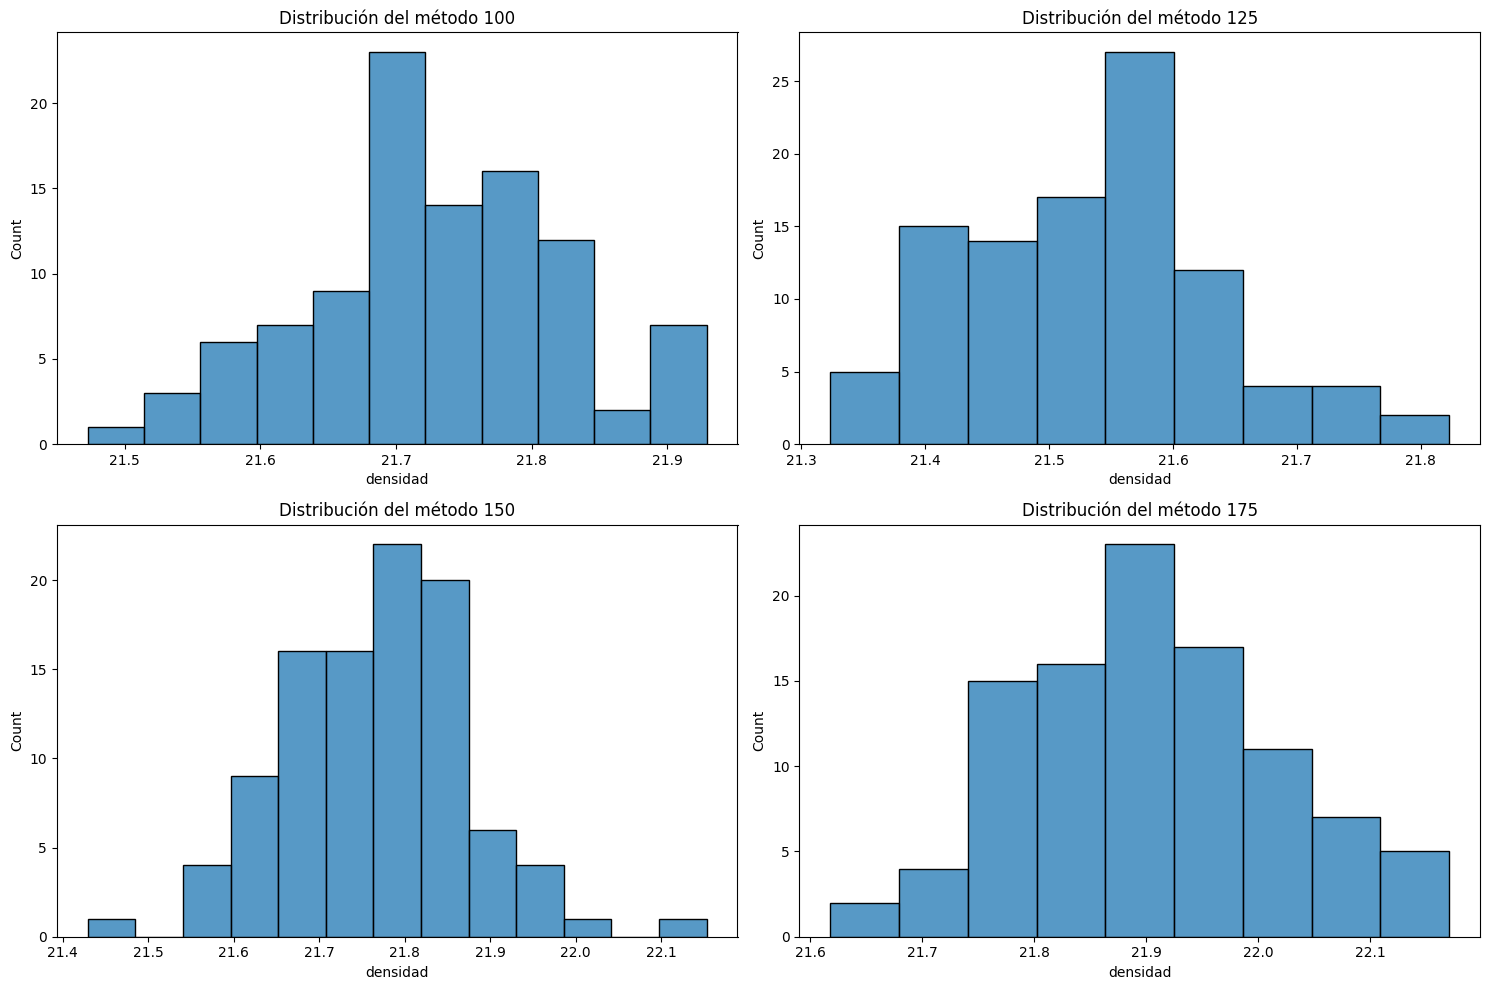

In [100]:
lista_temperaturas = df_fluido["temperatura"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, temperatura in enumerate(lista_temperaturas):
    sns.histplot(x="densidad", data=df_fluido[df_fluido["temperatura"] == temperatura], ax=axes[indice])
    axes[indice].set_title(f"Distribución del método {temperatura}")

plt.tight_layout()
plt.show()

In [101]:
montaje = Asunciones(df_fluido,"densidad")
montaje.identificar_homogeneidad("temperatura")


En la variable temperatura las varianzas son homogéneas entre grupos.


2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?


Text(0.5, 1.0, 'Media de Minutos por método')

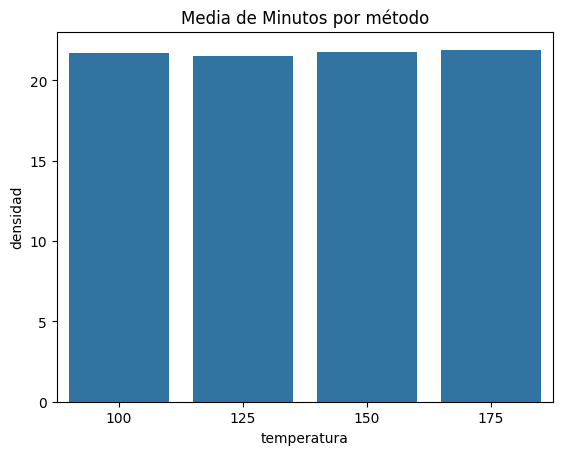

In [ ]:
df_tasa = df_fluido.groupby("temperatura")["densidad"].mean()
df_tasa
sns.barplot(df_tasa)
plt.title("Densidad media por temperatura")

A primera vista no parece que haya mucha diferencia entre todos, siendo 125 el que pareciera provocar menor densidad promedio

Veamos

In [103]:
parametricas = Pruebas_parametricas("temperatura","densidad",df_fluido)
parametricas.test_anova()

Estadístico F: 212.84277610615817
Valor p: 3.327798065119595e-82
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.


Estadísticamente podemos no aceptar la hipótesis nula y decir que hay valores significativos

3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [104]:
df_tasa

temperatura
100    21.729410
125    21.532402
150    21.766618
175    21.903682
Name: densidad, dtype: float64

Si, podemos decir que las temperaturas de 100 y 125 provocan menor densidad del fluido vs 150 y 175, siendo 125 la que menor densidad provoca de media